# Gunjan Chakraborty

## 22MSRDS007

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# Load the dataset
df = pd.read_csv('D:/Chools/Day_06/claimants.csv')

### 1. Exploratory Data Analysis (EDA):

In [3]:
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [5]:
df.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [6]:
# 1. Input mean for 'CLMAGE'
df['CLMAGE'].fillna(df['CLMAGE'].mean(), inplace=True)

# 2. Input median for 'CLMSEX', 'CLMINSUR', 'SEATBELT'
df['CLMSEX'].fillna(df['CLMSEX'].median(), inplace=True)
df['CLMINSUR'].fillna(df['CLMINSUR'].median(), inplace=True)
df['SEATBELT'].fillna(df['SEATBELT'].median(), inplace=True)

# Verify the changes
print(df.isnull().sum())

CASENUM     0
ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64


In [7]:
# Assuming your dataframe is named 'df'
unique_values_count = df.nunique()

# Print the number of unique values for each column
print("Number of Unique Values in Each Column:")
print(unique_values_count)


Number of Unique Values in Each Column:
CASENUM     1283
ATTORNEY       2
CLMSEX         2
CLMINSUR       2
SEATBELT       2
CLMAGE        69
LOSS         916
dtype: int64


In [8]:
df.isnull().sum()

CASENUM     0
ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [9]:
df=df.drop('CASENUM',axis=1)

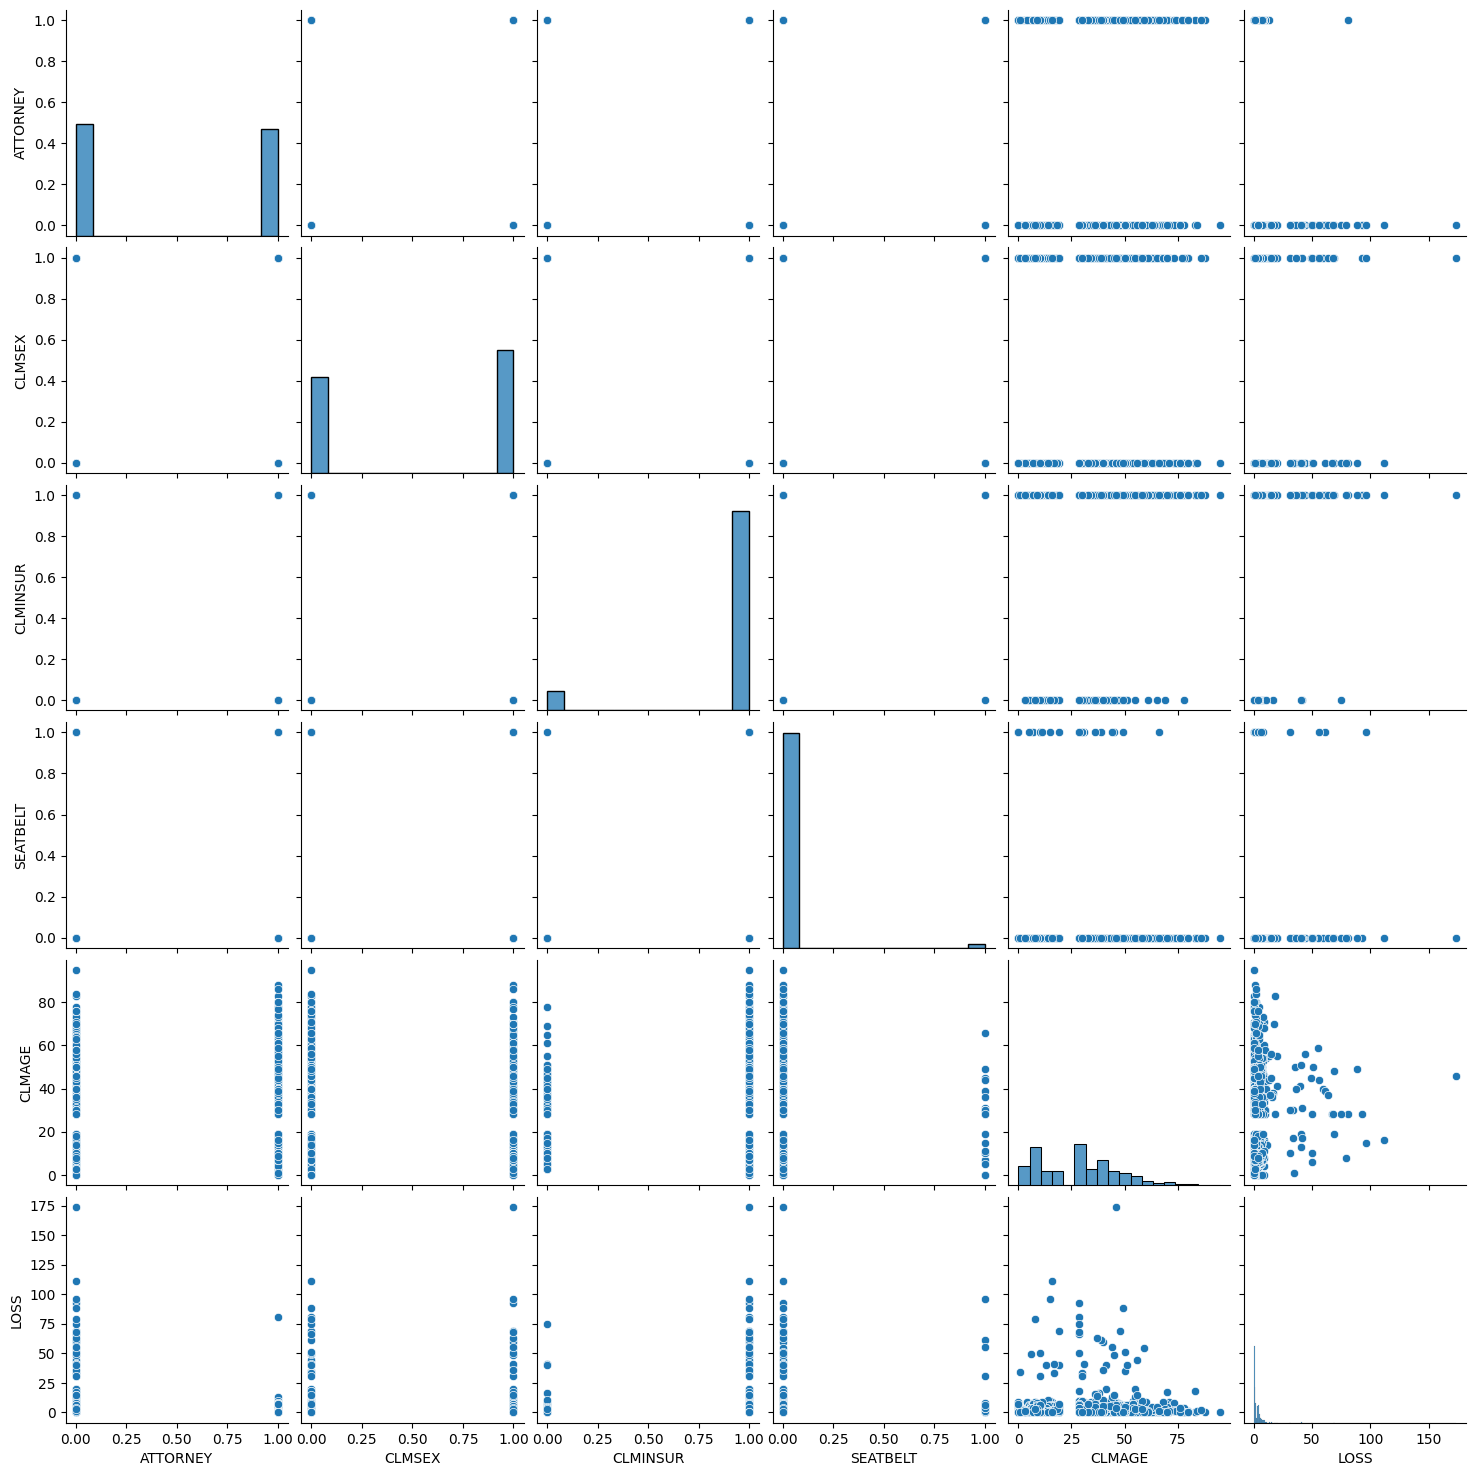

In [10]:
# Pairplot with Viridis color palette
sns.pairplot(df)
plt.show()

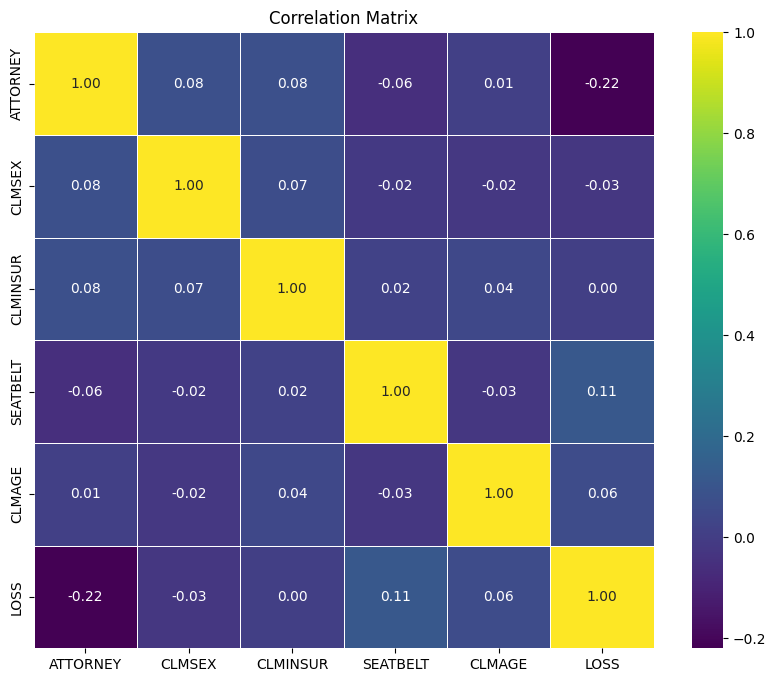

In [11]:
# Correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<Figure size 1200x800 with 0 Axes>

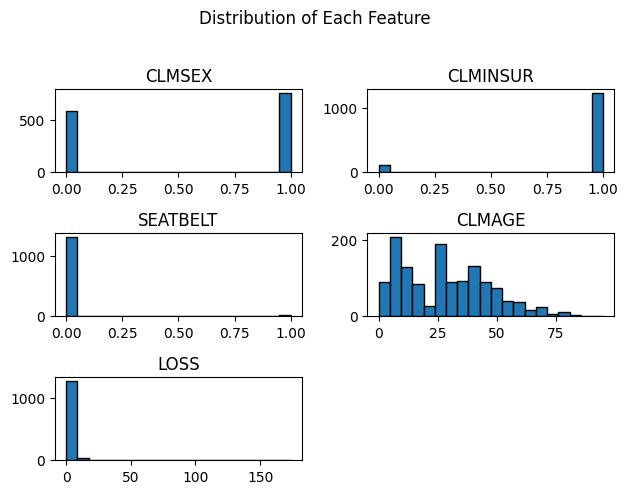

In [12]:
# Distribution of each feature
plt.figure(figsize=(12, 8))
df.drop('ATTORNEY', axis=1).hist(bins=20, edgecolor='black', grid=False)
plt.suptitle('Distribution of Each Feature', y=1.02)
plt.tight_layout()
plt.show()

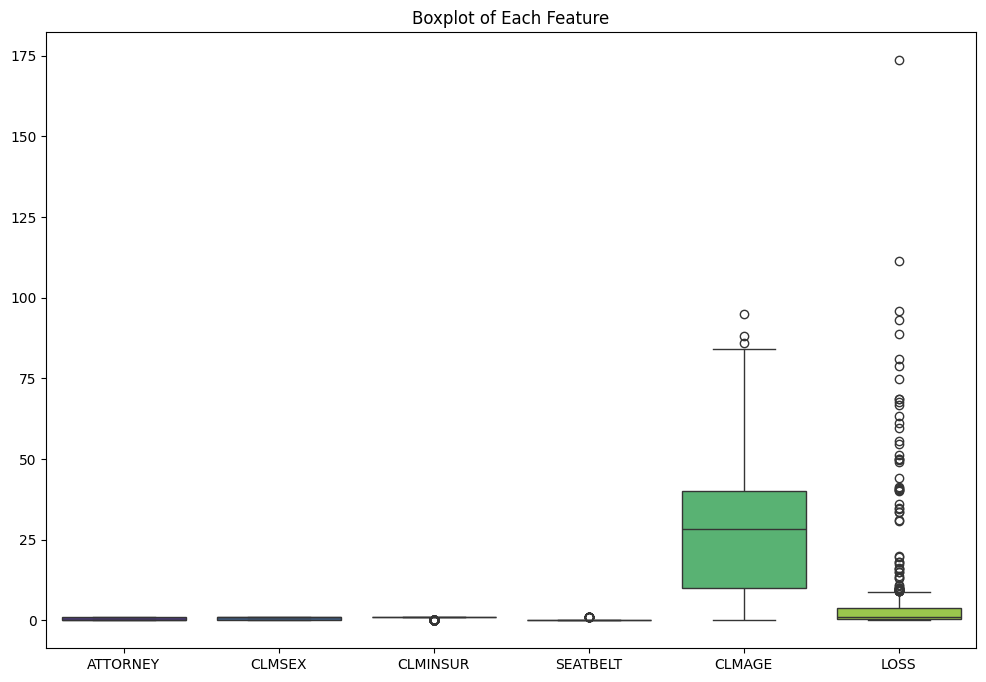

In [13]:
# Boxplot for each feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, palette='viridis')
plt.title('Boxplot of Each Feature')
plt.show()

<Figure size 600x400 with 0 Axes>

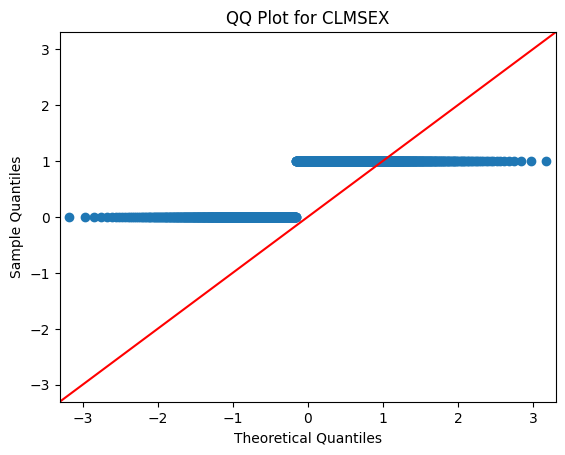

<Figure size 600x400 with 0 Axes>

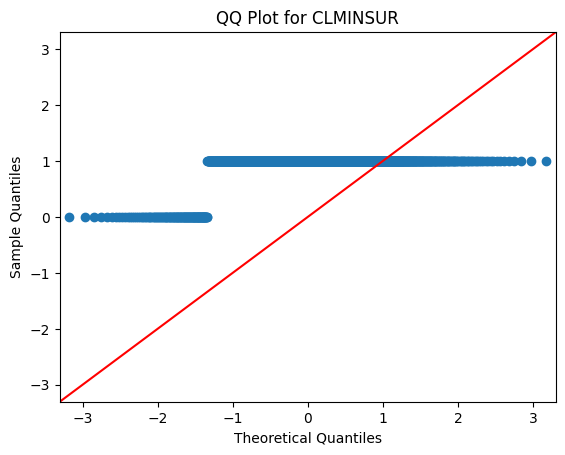

<Figure size 600x400 with 0 Axes>

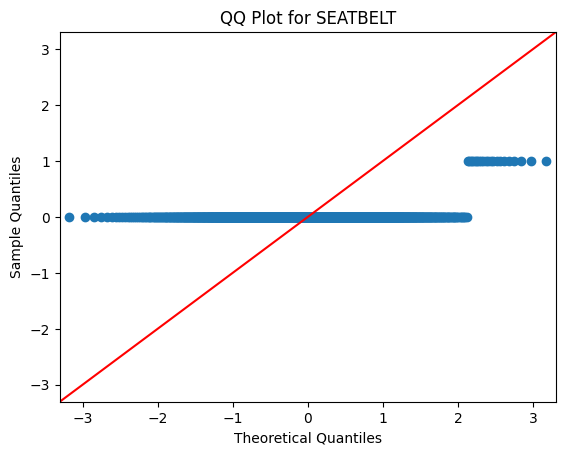

<Figure size 600x400 with 0 Axes>

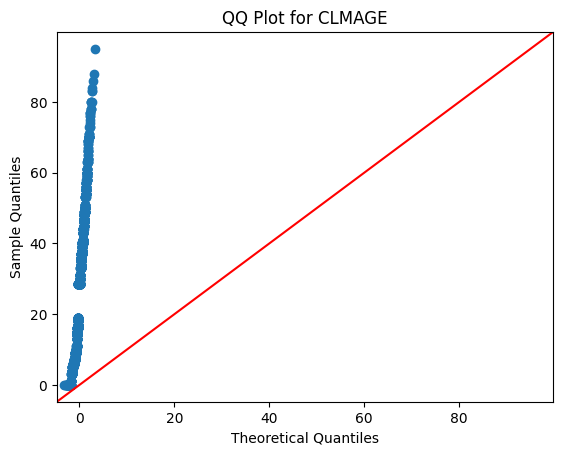

<Figure size 600x400 with 0 Axes>

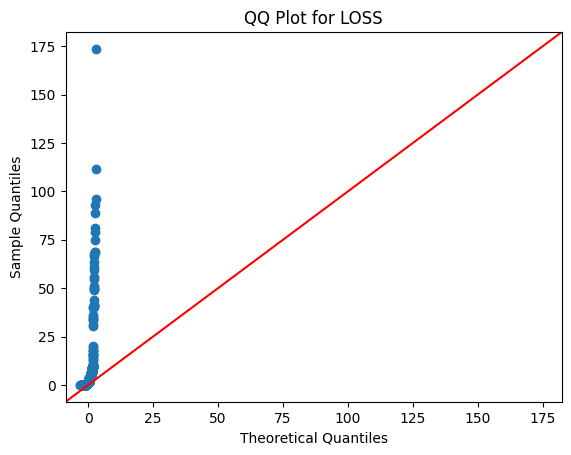

In [14]:
# QQ plot for each feature
for feature in df.columns:
    if feature not in ['CASENUM', 'ATTORNEY']:
        plt.figure(figsize=(6, 4))
        sm.qqplot(df[feature], line='45')
        plt.title(f'QQ Plot for {feature}')
        plt.show()

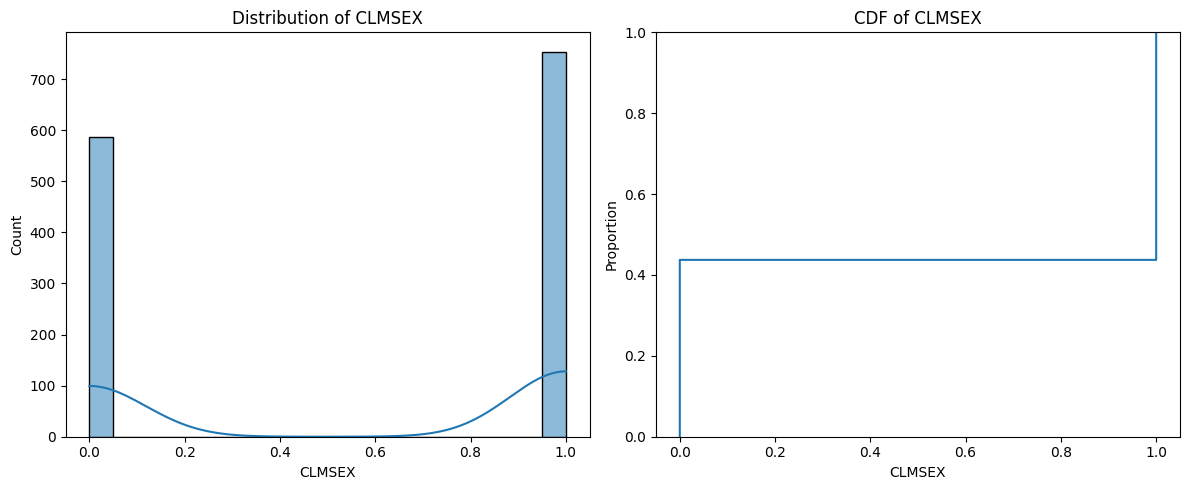

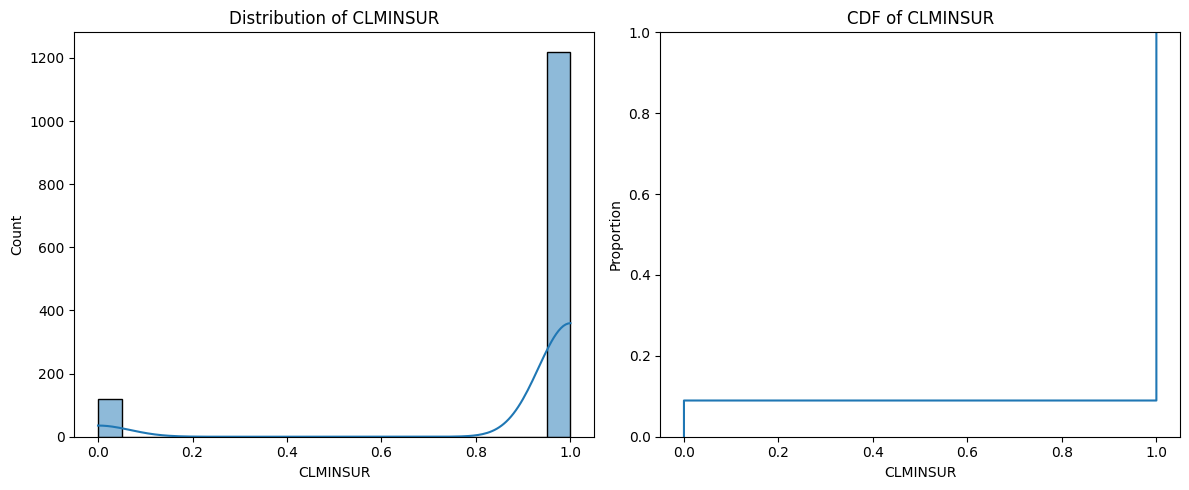

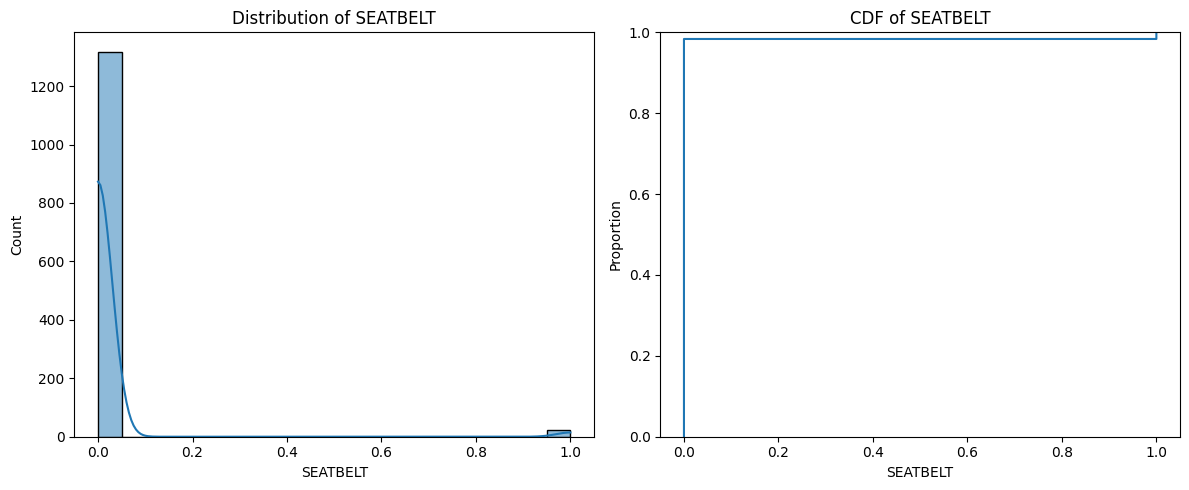

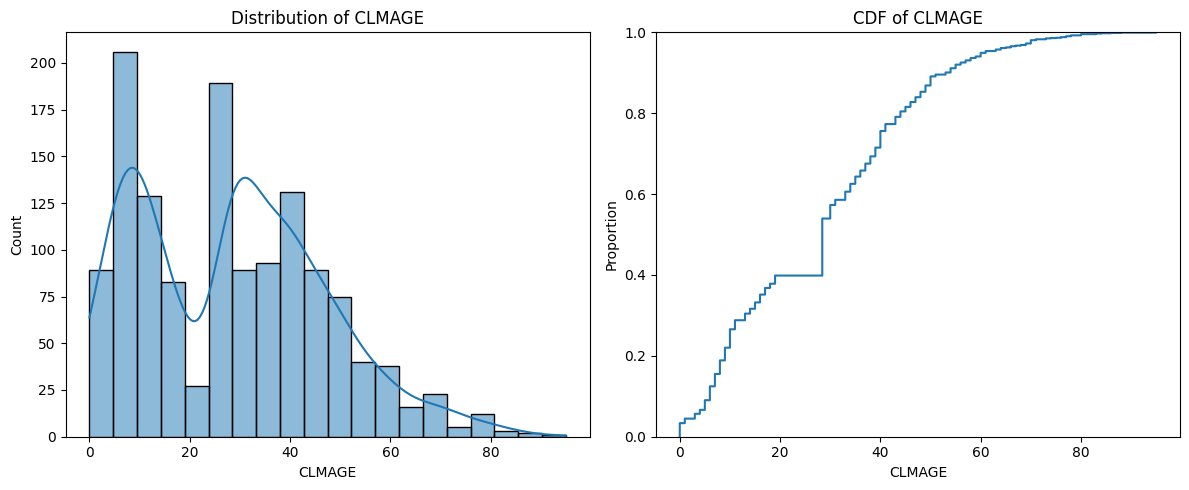

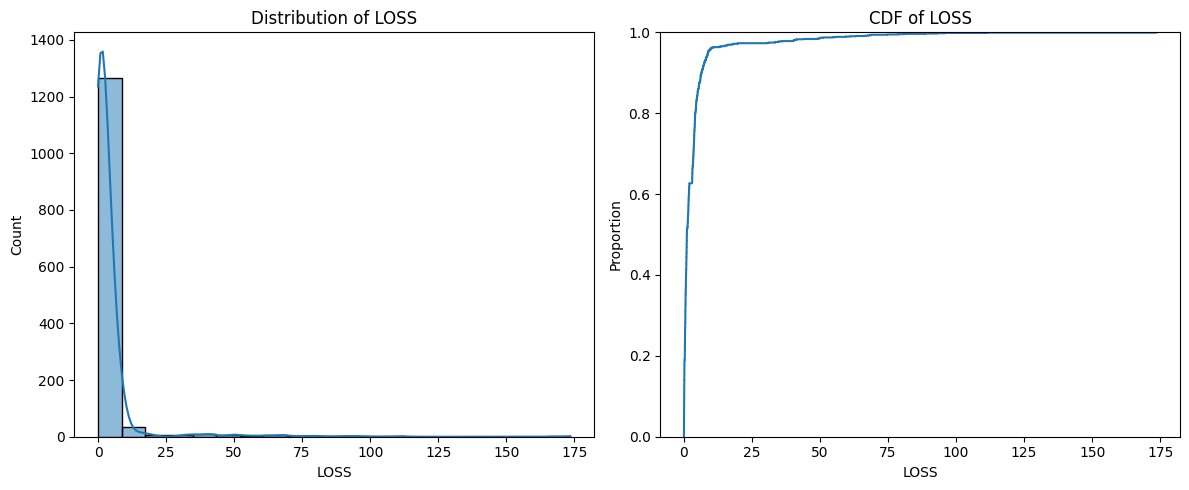

In [15]:
# Individual feature distributions and CDFs
for feature in df.columns:
    if feature not in ['CASENUM', 'ATTORNEY']:
        plt.figure(figsize=(12, 5))

        # Distribution plot
        plt.subplot(1, 2, 1)
        sns.histplot(df[feature], kde=True, bins=20)
        plt.title(f'Distribution of {feature}')

        # CDF plot
        plt.subplot(1, 2, 2)
        sns.ecdfplot(df[feature])
        plt.title(f'CDF of {feature}')

        plt.tight_layout()
        plt.show()

### checking VIF

In [16]:
# Assuming X contains the predictor variables
VIF = df.drop('ATTORNEY', axis=1)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = VIF.columns
vif_data["VIF"] = [variance_inflation_factor(VIF.values, i) for i in range(VIF.shape[1])]

# Display the VIF values
print(vif_data)

   Variable       VIF
0    CLMSEX  2.146477
1  CLMINSUR  3.809952
2  SEATBELT  1.030784
3    CLMAGE  2.859328
4      LOSS  1.141058


In [17]:
import numpy as np

# Calculate Z-scores for each column
z_scores = np.abs((df - df.mean()) / df.std())

# Define a threshold for outliers (e.g., Z-score greater than 3)
outlier_threshold = 3

# Identify outliers for each column
outliers = (z_scores > outlier_threshold).sum()

# Display the count of outliers for each column
print("Number of outliers for each column:")
print(outliers)

Number of outliers for each column:
ATTORNEY      0
CLMSEX        0
CLMINSUR    120
SEATBELT     22
CLMAGE        3
LOSS         30
dtype: int64


In [18]:
from scipy.stats.mstats import winsorize

# Set the threshold for winsorization (e.g., 5% from both ends)
winsorization_threshold = 0.05

# Apply winsorization to columns with outliers
columns_with_outliers = ['CLMINSUR', 'SEATBELT', 'CLMAGE', 'LOSS']

for column in columns_with_outliers:
    winsorized_values = winsorize(df[column], limits=winsorization_threshold)
    df[column] = winsorized_values

# Verify the changes
print(df.describe())

          ATTORNEY       CLMSEX     CLMINSUR  SEATBELT       CLMAGE  \
count  1340.000000  1340.000000  1340.000000    1340.0  1340.000000   
mean      0.488806     0.562687     0.910448       0.0    28.038303   
std       0.500061     0.496240     0.285646       0.0    17.525390   
min       0.000000     0.000000     0.000000       0.0     3.000000   
25%       0.000000     0.000000     1.000000       0.0    10.000000   
50%       0.000000     1.000000     1.000000       0.0    28.414422   
75%       1.000000     1.000000     1.000000       0.0    40.000000   
max       1.000000     1.000000     1.000000       0.0    61.000000   

              LOSS  
count  1340.000000  
mean      2.368237  
std       2.562772  
min       0.040000  
25%       0.400000  
50%       1.069500  
75%       3.781500  
max       8.801000  


### 3. Model Fitting:

In [19]:
X = df.drop('ATTORNEY', axis=1)
y = df['ATTORNEY']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# decision Tree

In [21]:
decision_tree = DecisionTreeClassifier(max_depth=3, min_samples_split=5, min_samples_leaf=2, class_weight='balanced')
decision_tree.fit(X_train, y_train)

y_pred_decision_tree = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_decision_tree)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.7350746268656716


In [22]:
bins = [0, 18, 35, 50, 100]
labels = ['0-18', '19-35', '36-50', '51-100']
df['CLMAGE_GROUP'] = pd.cut(df['CLMAGE'], bins=bins, labels=labels, right=False)
df = pd.get_dummies(df, columns=['CLMAGE_GROUP'], prefix='CLMAGE_GROUP', drop_first=True)

In [23]:
param_grid = {
 'criterion': ['gini', 'entropy'],
 'max_depth': [3],
 'min_samples_split': [5],
 'min_samples_leaf': [2],
 'class_weight': ['balanced']
}


dt_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

dt_model_best = DecisionTreeClassifier(random_state=42, **best_params)
dt_model_best.fit(X_train, y_train)
y_pred_best = dt_model_best.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)

print(f"Best Parameters: {best_params}")
print(f"Accuracy after tuning: {accuracy_best:.2f}")
print(f"Confusion Matrix:\n{conf_matrix_best}")
print(f"Classification Report:\n{classification_rep_best}")

Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy after tuning: 0.73
Confusion Matrix:
[[ 94  34]
 [ 38 102]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       128
           1       0.75      0.73      0.74       140

    accuracy                           0.73       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.73      0.73      0.73       268



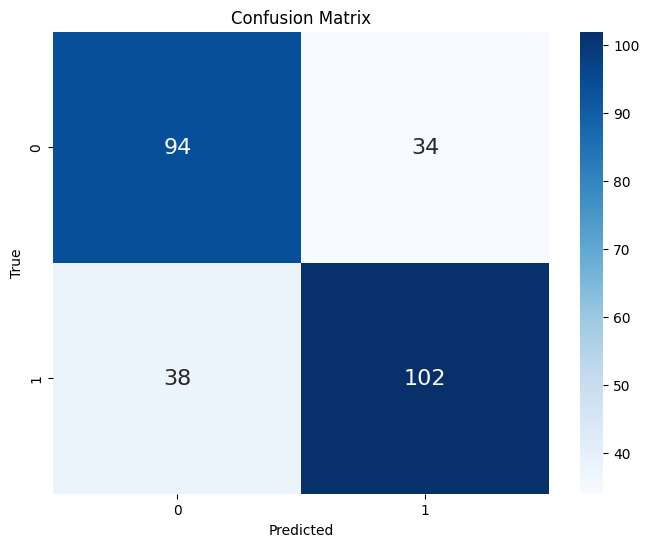

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with pre-pruning parameters
rf_model = RandomForestClassifier(n_estimators=100,max_depth=3, min_samples_split=5, min_samples_leaf=2, class_weight='balanced', random_state=42)  

# Fit the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forest): {accuracy_rf}")

Accuracy (Random Forest): 0.7425373134328358


## isolation forest

In [26]:
X = df.drop(columns=['ATTORNEY'])
y = df['ATTORNEY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [27]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01)
iso_forest.fit(X_train)

IsolationForest(contamination=0.01)

In [28]:
iso_forest = IsolationForest(contamination=0.01)
iso_forest.fit(X_train)

IsolationForest(contamination=0.01)

In [29]:
y_pred = iso_forest.predict(X_test)

In [30]:
y_pred_binary = [1 if pred == 1 else 0 for pred in y_pred]

In [31]:
print(y_pred_binary)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

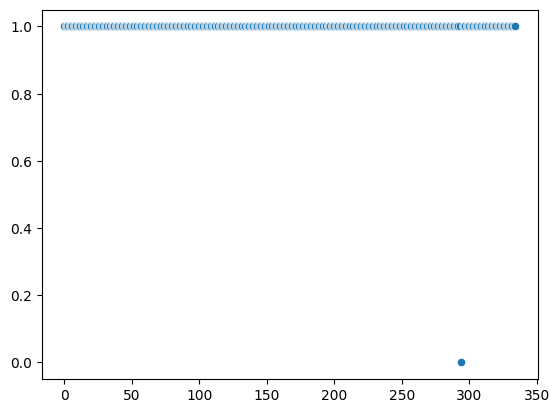

In [32]:
import matplotlib.pyplot as plt
sns.scatterplot(x=range(len(y_pred_binary)), y=y_pred_binary)
plt.show()